## Coursera & IBM - Python project for data science
# Analyzing Historical Stock/Revenue Data and Building a Dashboard
### Jón Helgi Elínar Kjartansson -GitHub @jongrjon

In [15]:
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3
import yfinance as yf
import pandas as pd

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [4]:
tesla = yf.Ticker("TSLA")
tesla_df = pd.DataFrame(tesla.history(period="max"))
tesla_df.reset_index(inplace=True)
tesla_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [7]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text
soup = BeautifulSoup(data)
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[0].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    vol = col[1].text
    print(date, vol)
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":vol}, ignore_index=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

2021 $53,823
2020 $31,536
2019 $24,578
2018 $21,461
2017 $11,759
2016 $7,000
2015 $4,046
2014 $3,198
2013 $2,013
2012 $413
2011 $204
2010 $117
2009 $112


,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


#### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [11]:
gamestop = yf.Ticker("GME")
gamestop_df = pd.DataFrame(gamestop.history(period="max"))
gamestop_df.reset_index(inplace=True)
gamestop_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


#### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [18]:
gmeurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data = requests.get(gmeurl).text
html_data = BeautifulSoup(data)
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in html_data.find_all("tbody")[0].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    vol = col[1].text
    gamestop_revenue = gamestop_revenue.append({"Date":date, "Revenue":vol}, ignore_index=True)
gamestop_revenue.tail()

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


#### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

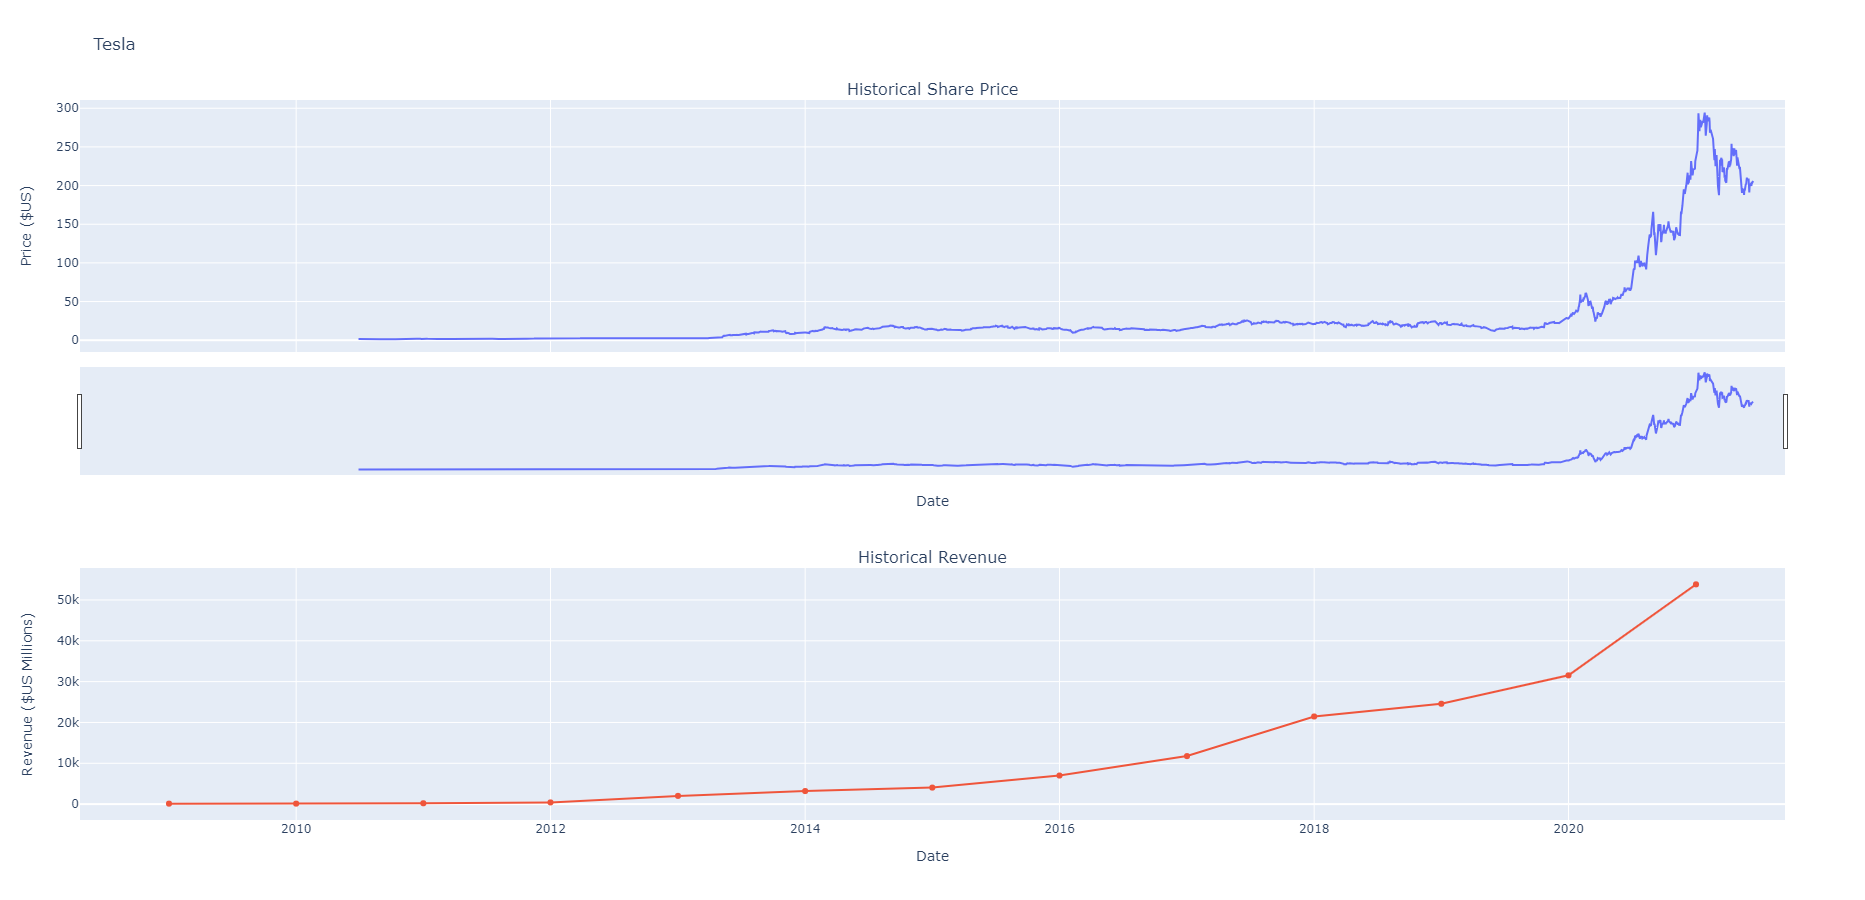

In [16]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
make_graph(tesla_df, tesla_revenue, 'Tesla')

#### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

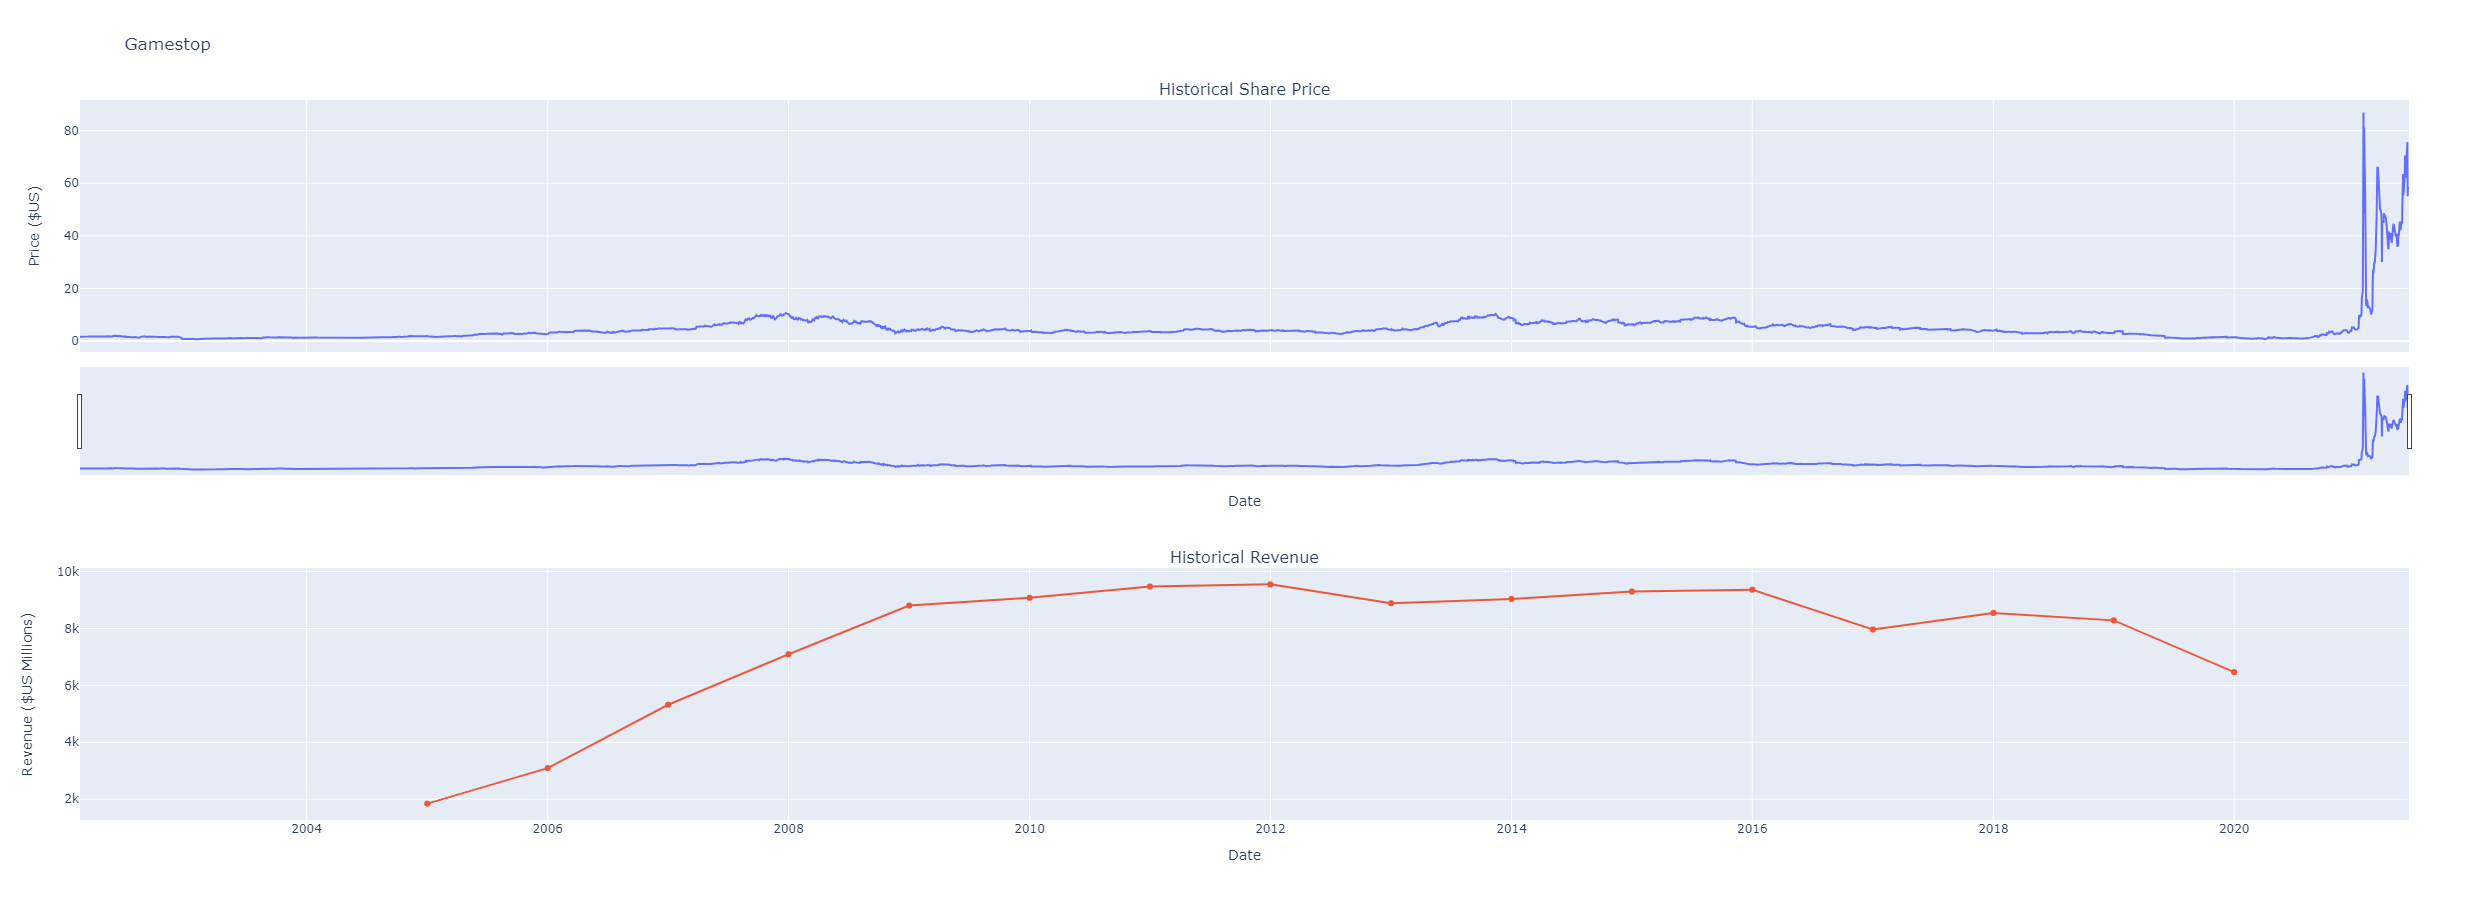

In [19]:
gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace(',|\$',"")
make_graph(gamestop_df, gamestop_revenue, 'Gamestop')